In [1]:
from scripts import fix_features, classify_regress
# from scripts import classify_regress
MEDIA_PATH = 'plots/'

2024-04-21 23:38:10.898694: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-21 23:38:10.899443: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-21 23:38:10.902361: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-21 23:38:10.948673: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-21 23:38:11.692854: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
predictors = classify_regress.predictors.copy()
predictors.append("avg_mood")
print(predictors)
data_clean = fix_features.get_clean_data()
data = fix_features.read_data()
data_clean.head()

['circumplex.valence', 'circumplex.arousal', 'activity', 'screen', 'appCat.communication', 'appCat.entertainment', 'appCat.social', 'avg_mood']


,id,date,daily_mood,avg_mood,activity,appCat.communication,appCat.entertainment,appCat.social,circumplex.arousal,circumplex.valence,screen,mood_category
0,AS14.01,2014-02-26,-1.005282,0.067911,-0.230601,-0.174626,-0.248860,-0.138612,-0.220617,0.144457,-0.253286,below average
1,AS14.01,2014-02-27,-0.892084,0.067911,-0.230601,-0.174626,-0.248860,-0.138612,0.156768,-0.815359,-0.253286,below average
2,AS14.01,2014-03-21,-1.073201,0.067911,0.185252,0.294062,-0.209818,0.032192,0.458676,-1.122500,1.084123,below average
3,AS14.01,2014-03-22,-0.801526,0.067911,1.298384,0.197531,-0.261799,-0.280958,1.062492,-0.431433,-0.520968,below average
4,AS14.01,2014-03-23,-0.258177,0.067911,0.279332,0.247096,-0.386101,-0.171895,0.458676,0.259635,-0.226534,below average


### Support Vector Classification

**Without average mood**

In [3]:
# Without average mood
y_test, y_pred, SVC_accuracy = classify_regress.conduct_SVC(data_clean, classify_regress.predictors)
SVC_accuracy

0.7677165354330708

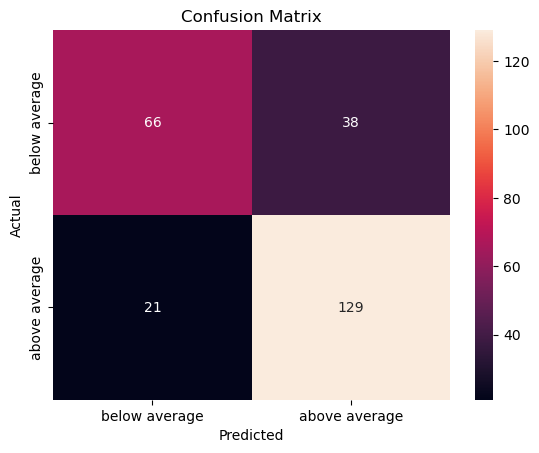

In [4]:
classify_regress.create_confusion_matrix(y_test, y_pred)

**With average mood**

In [5]:
data_clean = fix_features.get_clean_data()
data = fix_features.read_data()
# Without average mood
y_test_2, y_pred_2, SVC_accuracy = classify_regress.conduct_SVC(data_clean, predictors)
SVC_accuracy

0.7874015748031497

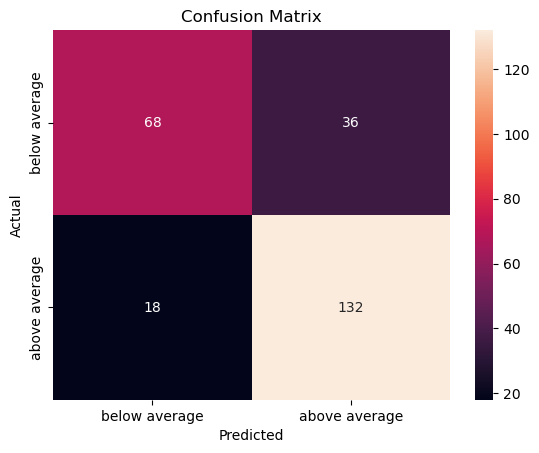

In [6]:
classify_regress.create_confusion_matrix(y_test_2, y_pred_2, save_fig=True)

**Algorithm 2: Gradiet Descent**


In [7]:
y_pred, y_test, accuracy = classify_regress.conduct_XGB(data_clean, predictors)
accuracy

0.7755905511811023

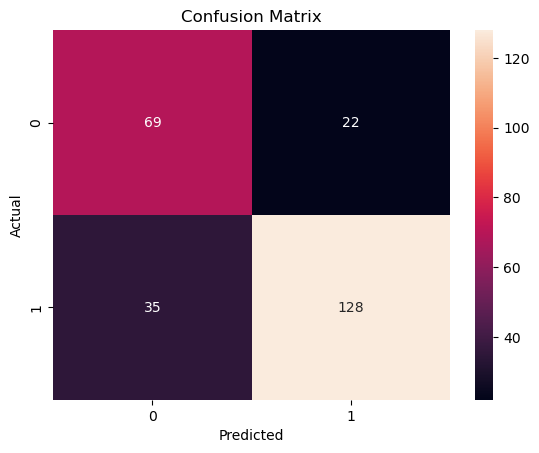

In [18]:
classify_regress.create_confusion_matrix(y_test, y_pred, save_fig=True, binary=True, name='XGB.png')

## Regression

**Check main variables: Stepwise Regression (Forward Selection)**

In [9]:
data_regress = data_clean.loc[:, data_clean.columns != 'mood_category']
forward_model = classify_regress.forward_selection(data_regress, 'daily_mood')
# print(forward_model.summary().as_latex())
forward_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             daily_mood   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     468.1
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          1.57e-247
Time:                        23:38:18   Log-Likelihood:                -1222.7
No. Observations:                1268   AIC:                             2455.
Df Residuals:                    1263   BIC:                             2481.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.462e-15      0.018  -8.19e-14      1.000      -0.035       0.035
circumplex_valence       0.6065      0.018     32.816      0.000       0.570       0.643
avg_mood                 0.3580      0.018     19.527      0.000       0.322       0.394
circumplex_arousal       0.0374      0.018      2.057      0.040       0.002       0.073
appCat_entertainment    -0.0320      0.018     -1.773      0.076      -0.067       0.003
==============================================================================
Omnibus:                       42.284   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.798
Skew:                           0.096   Prob(JB):                     2.89e-23
Kurtosis:                       4.388   Cond. No.                         1.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Algorithm 1: Support Vector Regression**

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
predictors

['circumplex.valence',
 'circumplex.arousal',
 'activity',
 'screen',
 'appCat.communication',
 'appCat.entertainment',
 'appCat.social',
 'avg_mood']

In [12]:
svr_model, svr_pred, svr_test = classify_regress.conduct_SVR(data_regress, predictors)
# Metrics
mae = mean_absolute_error(svr_test, svr_pred)
mse = mean_squared_error(svr_test, svr_pred)
rmse = mean_squared_error(svr_test, svr_pred, squared=False)  # False to get the RMSE
r2 = r2_score(svr_test, svr_pred)

print("Metrics for SVR model")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)



SVR - Mean Absolute Error: 0.49, R^2 Score: 0.55
Metrics for SVR model
Mean Absolute Error: 0.49408127439947097
Mean Squared Error: 0.4272076588721908
Root Mean Squared Error: 0.6536112444505455
R-squared: 0.5499649901024031


**Algorithm 2: Random Forest Regression**

In [13]:
rf_model, rf_pred, rf_test = classify_regress.conduct_RFR(data_regress, predictors)
# Metrics
mae = mean_absolute_error(rf_test, rf_pred)
mse = mean_squared_error(rf_test, rf_pred)
rmse = mean_squared_error(rf_test, rf_pred, squared=False)  # False to get the RMSE
r2 = r2_score(rf_test, rf_pred)

print("Metrics for RFR model")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)



Random Forest - MSE: 0.46, MAE: 0.51
Metrics for RFR model
Mean Absolute Error: 0.5050350310459606
Mean Squared Error: 0.4564587295543639
Root Mean Squared Error: 0.6756172951859387
R-squared: 0.5191509220243179


In [14]:
import matplotlib.pyplot as plt

def compare_predictions(predictions, test_data):
    plt.figure(figsize=(10, 6))
    plt.plot(predictions, label='Predictions')
    plt.plot(test_data, label='Actual')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Comparison of Predictions and Actual Test Data')
    plt.legend()
    plt.show()
    return accuracy


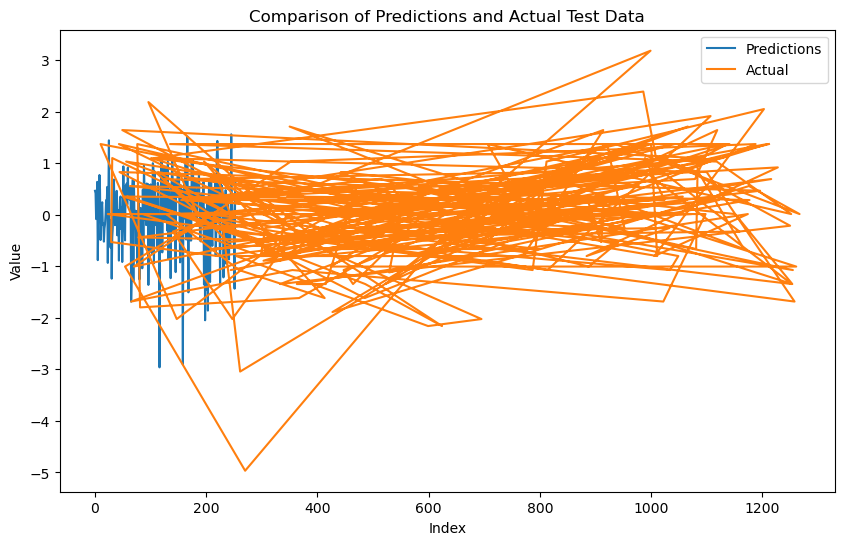

0.7755905511811023

In [15]:
compare_predictions(svr_pred, svr_test)

**Algorithm 1: Support Vector Regression**

In [16]:
svr_pred

array([ 4.64801554e-01,  4.17222141e-01, -8.42933423e-02, -2.50901140e-02,
        6.37921028e-01, -8.80840126e-01, -5.42892938e-02, -1.25568467e-01,
        7.71294785e-01,  4.87362880e-01, -4.90442083e-01, -1.33493469e-01,
        1.57171375e-01,  2.42051392e-01, -1.97643985e-01, -1.66994479e-01,
       -5.21610420e-01, -2.69038772e-01, -1.83507616e-01,  5.16416075e-04,
        2.83209388e-01,  1.66546355e-01,  5.40247566e-01, -9.34364623e-01,
        3.59160219e-01,  1.44393875e+00, -1.47370629e-01, -2.84429064e-01,
       -6.37345182e-01, -1.00586982e-01, -1.24025877e+00, -4.41164572e-01,
       -2.50299273e-01,  5.29787134e-01,  6.83131306e-01,  1.52082255e-01,
       -2.02693752e-01,  2.33159976e-02,  5.03527081e-02,  4.63601869e-01,
       -3.98813579e-01, -3.58287014e-02,  8.40616173e-02, -8.89641973e-01,
        6.30420978e-02,  3.12149030e-01,  3.55402318e-01, -2.78182151e-01,
        1.51550566e-01, -9.16865084e-01, -1.26614064e-01,  9.38850413e-01,
       -1.23339720e-01, -